<a href="https://colab.research.google.com/github/Mohsajjad/Speech-Emotion-Detection/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Male Neutral

In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_01/03-01-01-01-01-01-01.wav')

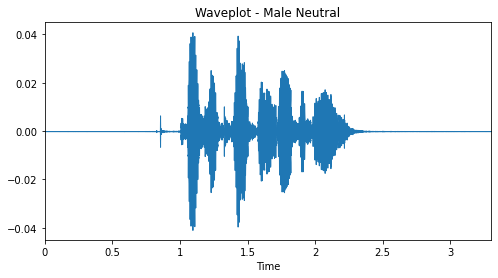

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

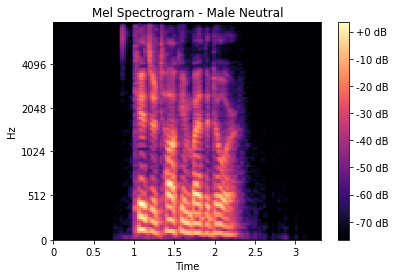

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

##Female Calm

In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_02/03-01-02-01-01-01-02.wav')

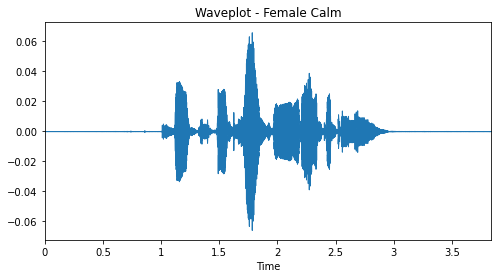

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

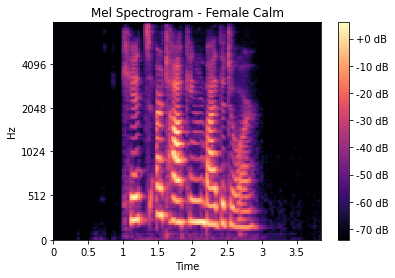

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

##Male Happy

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_03/03-01-03-01-01-01-03.wav')

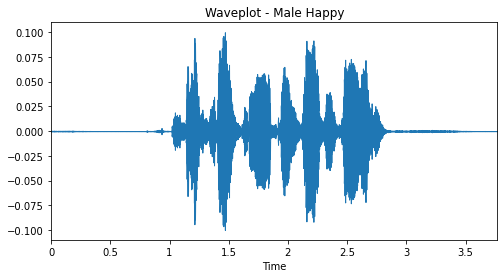

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

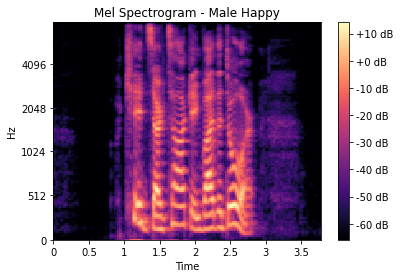

In [ ]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

##Female Sad

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_04/03-01-04-01-01-01-04.wav')

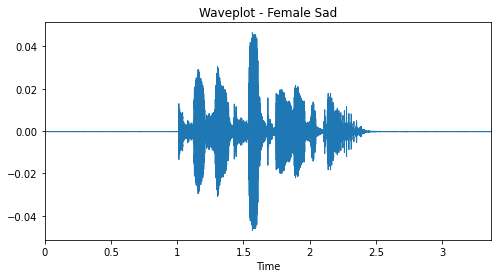

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

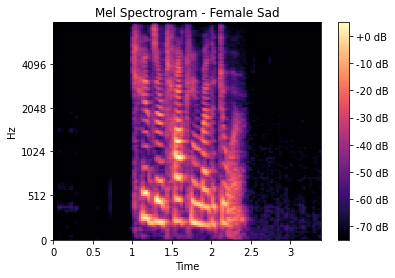

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

##Male Angry

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_05/03-01-05-01-01-01-05.wav')

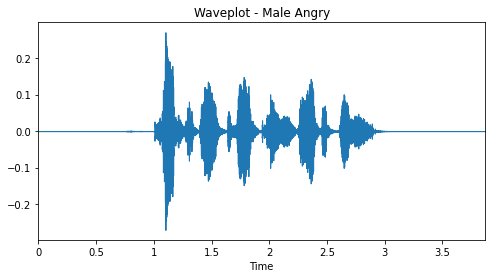

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

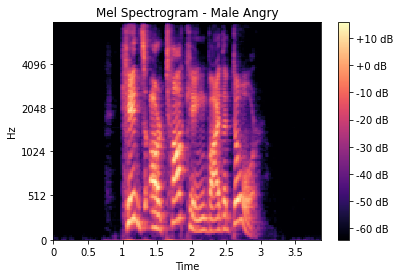

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');

##Female Fearful

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_06/03-01-06-01-01-01-06.wav')

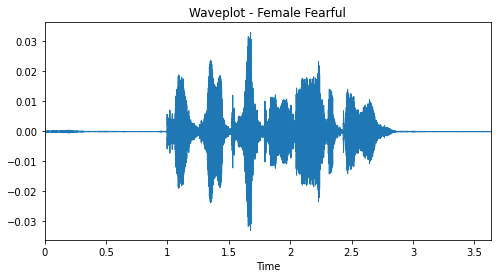

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')

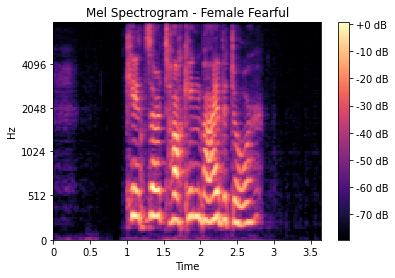

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

##Male Dsigust

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_07/03-01-07-01-01-01-07.wav')

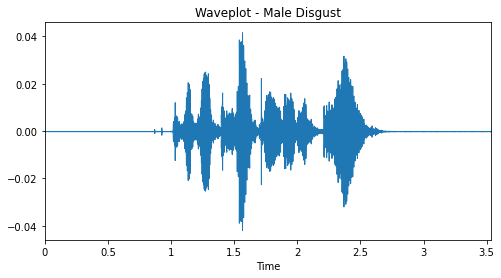

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')

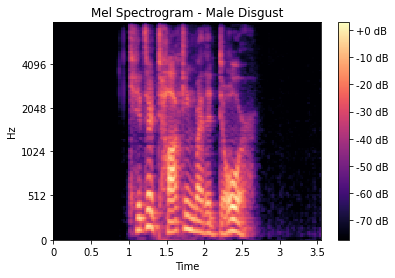

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB');

##Female Surprised

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/dataset/Actor_08/03-01-08-01-01-01-08.wav')

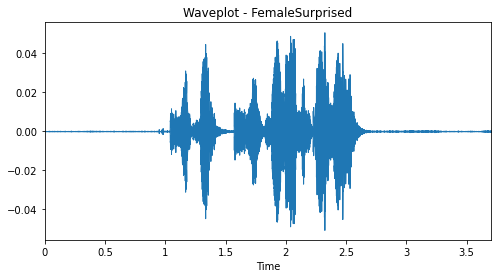

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')

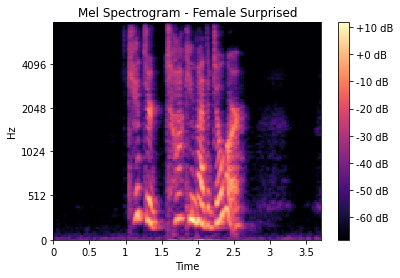

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');

#Data Preprocessing

##Labelling Audio Files

In [ ]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "/content/drive/MyDrive/dataset/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [ ]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [ ]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,surprise,1,/content/drive/MyDrive/dataset/Actor_01/03-01-...
1,male,surprise,1,/content/drive/MyDrive/dataset/Actor_01/03-01-...
2,male,surprise,1,/content/drive/MyDrive/dataset/Actor_01/03-01-...
3,male,surprise,1,/content/drive/MyDrive/dataset/Actor_01/03-01-...
4,male,surprise,1,/content/drive/MyDrive/dataset/Actor_01/03-01-...
...,...,...,...,...
1435,female,angry,24,/content/drive/MyDrive/dataset/Actor_24/03-01-...
1436,female,calm,24,/content/drive/MyDrive/dataset/Actor_24/03-01-...
1437,female,neutral,24,/content/drive/MyDrive/dataset/Actor_24/03-01-...
1438,female,surprise,24,/content/drive/MyDrive/dataset/Actor_24/03-01-...


In [ ]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,gender,emotion,actor,path
1417,female,happy,24,/content/drive/MyDrive/dataset/Actor_24/03-01-03-02-02-02-24.wav
14,male,fear,1,/content/drive/MyDrive/dataset/Actor_01/03-01-06-01-01-02-01.wav
1228,male,neutral,21,/content/drive/MyDrive/dataset/Actor_21/03-01-01-01-01-02-21.wav
438,female,fear,8,/content/drive/MyDrive/dataset/Actor_08/03-01-06-01-02-02-08.wav
33,male,sad,1,/content/drive/MyDrive/dataset/Actor_01/03-01-04-02-02-01-01.wav
1435,female,angry,24,/content/drive/MyDrive/dataset/Actor_24/03-01-05-02-02-01-24.wav
1240,male,surprise,21,/content/drive/MyDrive/dataset/Actor_21/03-01-08-01-02-02-21.wav
1227,male,happy,21,/content/drive/MyDrive/dataset/Actor_21/03-01-03-02-02-01-21.wav
4,male,surprise,1,/content/drive/MyDrive/dataset/Actor_01/03-01-08-01-01-01-01.wav
226,female,happy,4,/content/drive/MyDrive/dataset/Actor_04/03-01-03-01-01-01-04.wav


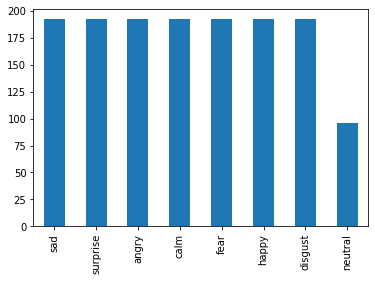

In [ ]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [ ]:
# EXPORT TO CSV
audio_df.to_csv('/content/drive/MyDrive/dataset/audio.csv')

##Feature Extraction

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -64.78024, -63.904263, -62.877224, -63.860825, -64.78024, -64.74918, -64.49985, -64.46006, -64.318756, -47.7917, -32.809784, -28.771551, -28.664127, -30.139662, -33.50749, -34.266476, -28.587252, -22.867876, -22.35416, -22.43961, -23.050331, -25.092999, -27.574385, -26.586393, -25.053396, -26.52865, -30.629469, -34.29249, -36.085144, -37.97172, -39.150055, -39.090736, -38.30471, -37.50517, -33.54492, -31.702133, -33.24639, -34.04333, -36.499004, -36.10525, -32.282776, -30.322493, -29.14313, -28.675568, -28.321112, -31.921623, -37.97586, -41.266502, -42.232227, -35.37523, -31.549637, -31.624096, -32.279896, -33.760735, -33.55256, -35.01447, -35.904133, -31.073309, -25.477175, -23.628792, -24.115911, -25.450222, -26.098444, -26.29641, -27.834692, -28.078741, ...]"
1,"[-68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.19867, -68.18072, -64.584915, -63.224354, -63.93743, -64.87589, -67.59597, -54.212345, -38.422825, -33.756702, -34.906837, -37.918053, -34.96119, -30.54462, -26.522366, -25.097118, -26.049805, -27.381273, -28.98046, -31.104029, -32.436295, -33.944443, -36.05974, -36.874847, -38.003582, -38.7118, -39.83447, -40.75709, -40.7427, -41.07363, -38.95155, -34.940998, -29.962744, -27.761992, -28.181961, -28.308937, -28.941454, -29.514957, -30.713438, -33.3974, -38.83982, -42.681393, -42.42662, -36.166534, -33.162735, -33.034813, -32.414173, -30.611628, -29.006195, -26.544353, -22.914862, -21.394623, -21.710487, -22.7711, -23.845482, -22.829323, -22.590225, -25.746479, -31.20132, -35.098434, -35.539364, -32.762497, -32.102222, -34.4583, -37.24139, -31.23271, ...]"
2,"[-66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.9019, -66.55817, -64.96431, -59.11459, -58.92808, -63.955395, -65.18036, -64.83887, -64.909294, -42.262726, -33.49219, -26.554441, -22.543894, -20.880257, -21.884754, -22.906576, -23.618156, -25.11552, -26.043886, -26.526283, -27.242893, -28.090107, -28.831469, -28.624914, -28.7567, -29.037949, -29.787184, -33.401608, -37.08944, -39.28508, -37.248993, -34.7255, -34.53201, -32.287083, -29.129454, -26.842087, -25.46901, -24.88869, -25.089857, -26.326063, -27.413134, -27.792904, -29.279457, -31.153473, -31.655607, -31.247965, -32.07828, -28.360546, -22.23322, -23.21411, -26.419159, -27.134438, -31.37285, -36.113483, -32.89237, -29.260624, -29.311972, -30.364254, -30.382711, -31.953375, -33.963196, -35.413536, -36.35504, -36.9106, -29.762636, -24.605377, -24.852396, ...]"
3,"[-73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -73.11231, -72.98181, -72.595764, -72.807724, -72.18857, -72.07274, -72.42312, -52.55816, -41.602516, -39.43955, -42.585968, -43.600655, -38.08021, -34.140495, -32.578

In [ ]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [ ]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [ ]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,surprise,1,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-63.904263,-62.877224,...,-64.201439,-64.365280,-64.116051,-64.237045,-64.573326,-64.709656,-64.759377,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243,-64.780243
1,male,surprise,1,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.180717,-64.584915,...,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,-68.198669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,surprise,1,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.558167,-64.964310,-59.114590,...,-66.901901,-66.901901,-66.901901,-66.901901,-66.896049,-66.725151,-66.762871,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.901901,-66.857422,-66.593987,-66.761574,-66.901901,-66.901901,-66.901901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,surprise,1,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,...,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,-73.112312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,surprise,1,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70.461830,-70

##Prepping Data for Modeling

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [ ]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


##Data Preprocessing

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [ ]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

##Base Model

In [ ]:
X_train.shape

(1152, 259, 1)

In [ ]:
X_test.shape

(288, 259, 1)

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.034722222222222224

##Initial Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 250, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 241, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/40
36/36 [==============================] - ETA: 0s - loss: 2.4917 - accuracy: 0.2361
Epoch 00001: val_accuracy improved from -inf to 0.30208, saving model to best_initial_model.hdf5
36/36 [==============================] - 6s 130ms/step - loss: 2.4917 - accuracy: 0.2361 - val_loss: 2.1748 - val_accuracy: 0.3021
Epoch 2/40
36/36 [==============================] - ETA: 0s - loss: 2.0490 - accuracy: 0.2700
Epoch 00002: val_accuracy improved from 0.30208 to 0.31597, saving model to best_initial_model.hdf5
36/36 [==============================] - 4s 122ms/step - loss: 2.0490 - accuracy: 0.2700 - val_loss: 1.9855 - val_accuracy: 0.3160
Epoch 3/40
36/36 [==============================] - ETA: 0s - loss: 1.8755 - accuracy: 0.2891
Epoch 00003: val_accuracy improved from 0.31597 to 0.34028, saving model to best_initial_model.hdf5
36/36 [==============================] - 4s 121ms/step - loss: 1.8755 - accuracy: 0.2891 - val_loss: 1.8367 - val_accuracy: 0.3403
Epoch 4/40
36/36 [==========

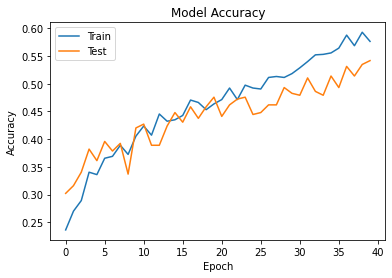

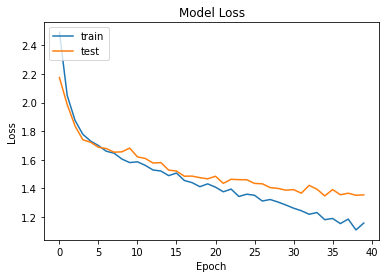

In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

##Post Model Analysis

In [ ]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 30ms/step - loss: 1.3545 - accuracy: 0.5417
Loss of the model is -  1.3544981479644775
9/9 [==============================] - 0s 30ms/step - loss: 1.3545 - accuracy: 0.5417
Accuracy of the model is -  54.16666865348816 %


In [ ]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,sad
141,surprise,surprise
142,neutral,neutral
143,sad,sad
144,fear,fear
145,sad,happy
146,disgust,disgust
147,angry,angry
148,surprise,surprise
149,angry,fear


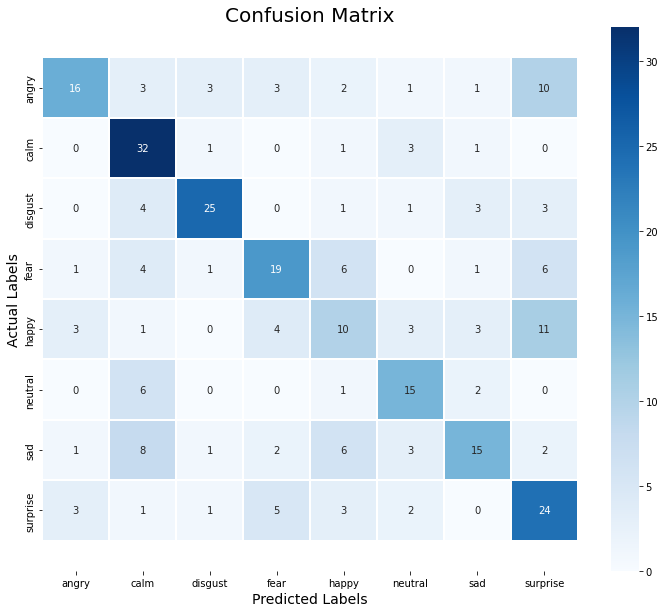

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.67      0.41      0.51        39
        calm       0.54      0.84      0.66        38
     disgust       0.78      0.68      0.72        37
        fear       0.58      0.50      0.54        38
       happy       0.33      0.29      0.31        35
     neutral       0.54      0.62      0.58        24
         sad       0.58      0.39      0.47        38
    surprise       0.43      0.62      0.51        39

    accuracy                           0.54       288
   macro avg       0.56      0.54      0.54       288
weighted avg       0.56      0.54      0.54       288



##Hyperparameter Tuning

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(1152, 259)
(288, 259)


In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [ ]:
from tensorflow.keras.utils import to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
opt = keras.optimizers.Adam(lr=0.0001)
def make_classifier(optimizer=opt):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
y_trainHot=np.argmax(y_train, axis=1)

In [ ]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_trainHot)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 111ms/step - loss: 2.9001 - accuracy: 0.1553


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8959 - accuracy: 0.1379


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8942 - accuracy: 0.1703


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8879 - accuracy: 0.1594


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8707 - accuracy: 0.1757


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8990 - accuracy: 0.1585


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 112ms/step - loss: 2.9022 - accuracy: 0.1564


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 108ms/step - loss: 2.8864 - accuracy: 0.1573


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 111ms/step - loss: 2.8785 - accuracy: 0.1714


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8874 - accuracy: 0.1562


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8761 - accuracy: 0.1911


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8973 - accuracy: 0.1357


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8865 - accuracy: 0.1649


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8745 - accuracy: 0.1649


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8777 - accuracy: 0.1649


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.9022 - accuracy: 0.1498


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8782 - accuracy: 0.1574


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8737 - accuracy: 0.1659


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8785 - accuracy: 0.1887


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8724 - accuracy: 0.1594


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8588 - accuracy: 0.1607


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 5s 109ms/step - loss: 2.8772 - accuracy: 0.1705


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8812 - accuracy: 0.1584


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8717 - accuracy: 0.1790


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 111ms/step - loss: 2.8736 - accuracy: 0.1540


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8955 - accuracy: 0.1650


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8556 - accuracy: 0.1618


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 108ms/step - loss: 2.8983 - accuracy: 0.1377


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 109ms/step - loss: 2.8789 - accuracy: 0.1692


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


31/31 [==============================] - 4s 110ms/step - loss: 2.8813 - accuracy: 0.1692


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8941 - accuracy: 0.1553


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8912 - accuracy: 0.1737


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8807 - accuracy: 0.1725


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 115ms/step - loss: 2.8738 - accuracy: 0.1638


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8896 - accuracy: 0.1725


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8931 - accuracy: 0.1661


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8932 - accuracy: 0.1585


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8774 - accuracy: 0.1855


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 117ms/step - loss: 2.8743 - accuracy: 0.1735


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8807 - accuracy: 0.1703


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 5s 115ms/step - loss: 2.8939 - accuracy: 0.1477


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 115ms/step - loss: 2.8921 - accuracy: 0.1564


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8846 - accuracy: 0.1703


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 115ms/step - loss: 2.8853 - accuracy: 0.1735


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8815 - accuracy: 0.1432


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8975 - accuracy: 0.1444


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 115ms/step - loss: 2.8800 - accuracy: 0.1661


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8903 - accuracy: 0.1605


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 117ms/step - loss: 2.9042 - accuracy: 0.1497


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 115ms/step - loss: 2.8631 - accuracy: 0.1757


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8791 - accuracy: 0.1531


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8938 - accuracy: 0.1412


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8725 - accuracy: 0.1800


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.8512 - accuracy: 0.1866


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 115ms/step - loss: 2.8874 - accuracy: 0.1670


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 117ms/step - loss: 2.8653 - accuracy: 0.1846


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 117ms/step - loss: 2.8557 - accuracy: 0.1868


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 117ms/step - loss: 2.8694 - accuracy: 0.1887


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 116ms/step - loss: 2.9012 - accuracy: 0.1594


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/29 [==============================] - 4s 115ms/step - loss: 2.8937 - accuracy: 0.1443


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8962 - accuracy: 0.1716


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8746 - accuracy: 0.1683


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.9184 - accuracy: 0.1399


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8722 - accuracy: 0.1866


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.9070 - accuracy: 0.1529


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8860 - accuracy: 0.1683


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8825 - accuracy: 0.1607


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.8799 - accuracy: 0.1649


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8984 - accuracy: 0.1475


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.9011 - accuracy: 0.1453


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8926 - accuracy: 0.1466


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.9119 - accuracy: 0.1509


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8867 - accuracy: 0.1855


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.8798 - accuracy: 0.1649


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 121ms/step - loss: 2.8736 - accuracy: 0.1866


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.9107 - accuracy: 0.1498


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8945 - accuracy: 0.1661


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.8908 - accuracy: 0.1681


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8923 - accuracy: 0.1367


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8780 - accuracy: 0.1779


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8931 - accuracy: 0.1564


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.9020 - accuracy: 0.1596


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.8739 - accuracy: 0.1703


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8830 - accuracy: 0.1746


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 121ms/step - loss: 2.8505 - accuracy: 0.1811


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 121ms/step - loss: 2.8918 - accuracy: 0.1716


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.9067 - accuracy: 0.1422


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 121ms/step - loss: 2.8755 - accuracy: 0.2072


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 120ms/step - loss: 2.8647 - accuracy: 0.1800


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/28 [==============================] - 4s 119ms/step - loss: 2.8993 - accuracy: 0.1486


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


36/36 [==============================] - 5s 116ms/step - loss: 2.8693 - accuracy: 0.1649


In [ ]:
grid_search.best_params_

{'batch_size': 32, 'nb_epoch': 50, 'optimizer': 'adam'}

In [ ]:
grid_search.best_score_

0.253416149068323

In [ ]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/50
36/36 [==============================] - ETA: 0s - loss: 1.2116 - accuracy: 0.5929
Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to best_initial_model.hdf5
36/36 [==============================] - 4s 123ms/step - loss: 1.2116 - accuracy: 0.5929 - val_loss: 1.0819 - val_accuracy: 0.6250
Epoch 2/50
36/36 [==============================] - ETA: 0s - loss: 1.1975 - accuracy: 0.5625
Epoch 00002: val_accuracy improved from 0.62500 to 0.64236, saving model to best_initial_model.hdf5
36/36 [==============================] - 4s 122ms/step - loss: 1.1975 - accuracy: 0.5625 - val_loss: 1.0008 - val_accuracy: 0.6424
Epoch 3/50
36/36 [==============================] - ETA: 0s - loss: 1.1317 - accuracy: 0.5998
Epoch 00003: val_accuracy did not improve from 0.64236
36/36 [==============================] - 4s 120ms/step - loss: 1.1317 - accuracy: 0.5998 - val_loss: 1.0013 - val_accuracy: 0.6250
Epoch 4/50
36/36 [==============================] - ETA: 0s - loss: 1.151